In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import math

In [2]:
def plotCurrent(X, Rnk, Kmus):
    N, D = np.shape(X)
    K = np.shape(Kmus)[0]

    InitColorMat = np.matrix([[1, 0, 0], 
                              [0, 1, 0],   
                              [0, 0, 1],
                              [0, 0, 0],
                              [1, 1, 0], 
                              [1, 0, 1], 
                              [0, 1, 1]])

    KColorMat = InitColorMat[0:K]
    colorVec = Rnk.dot(KColorMat)
    muColorVec = np.eye(K).dot(KColorMat)

    plt.scatter(X[:,0], X[:,1], edgecolors=colorVec, marker='o', facecolors='none', alpha=0.3)
    plt.scatter(Kmus[:,0], Kmus[:,1], c=muColorVec, marker='D', s=50);

In [3]:
def calcSqDistances(X, Kmus):
    sqDmat = []
    for mean in Kmus:
        norm_array = []
        for point in X:
            norm_array.append(np.linalg.norm(point - mean))
        sqDmat.append(norm_array)
    return np.array(sqDmat).T

In [4]:
def determineRnk(sqDmat):
    mean_rank = []
    for i in sqDmat:
        cluster_val = []
        for j in i: 
            closest = i.min()
            if j == closest:
                cluster_val.append(1)
            else: 
                cluster_val.append(0)
        mean_rank.append(cluster_val)
    return np.array(mean_rank)

In [13]:
def recalcMus(X, Rnk):
    # Fill this
    N = np.shape(X)[0]#13569
    k = np.shape(Rnk)[1] #2
    
    
    Kmus = np.empty(shape=(k,np.shape(X)[1]),dtype='object')
    
    for i in range(k):#0-1
        cluster_sum = np.zeros(np.shape(X)[1])
        count = 0
        
        for j in range(N): #from 0-13568
            cluster_sum = cluster_sum + Rnk[j][i]*X[j]
            count += Rnk[j][i]
            
        Kmus[i] = cluster_sum/count ##gives the actual means
        
    print (cluster_sum)
    print(count)
    return Kmus

### implemented this Within Clusters sum of squares in the WCSS function

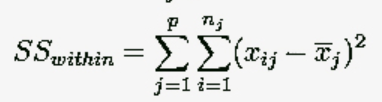

In [6]:
def wcss(Kmus, K, X, Rnk):
    sum_ = 0
    sum_k = 0
    for k in range(K):
        sum_ += sum_k
        sum_k = np.zeros(np.shape(X)[1])
        count_k = 0
        for j in range(np.shape(X)[0]):#loop through 13569 times 
            if(Rnk[j][k] == 1): #since the indices in Rnk correspond to the value in X take the k value of the jth rank
                sum_k = sum_k + (X[j] - Kmus[k])**2 #take the value at index j subtract by the corresponding mu
                count_k += 1
            else: 
                continue
        
        sum_k = (np.sum(sum_k))
        
    return sum_

In [7]:
def runKMeans(K, csv_filepath):
    # Load cleaned data in
    data = pd.read_csv(csv_filepath)
    
    # drop non numerical values in order to run K-means and convert into a numpy array
    X = data.drop(['Unnamed: 0', 'Brand', 'Model', 'Added'], axis = 1)
    X = np.array(X)
    
    # Determine and store data set information; N is the number of objects, D is the number of attributes
    N,D = X.shape

    # Allocate space for the Kmu vectors
    Kmus = np.zeros((K, D))
    
    # Initialize cluster centers by randomly picking points from the data
    rndinds = np.random.permutation(N)
    Kmus = X[rndinds[:K]];
    
    # Specify the maximum number of iterations to allow
    maxiters = 1000;

    for iter in range(maxiters):
        # Assign each data vector to closest mu vector 
        # Do this by first calculating a squared distance matrix where the n,k entry
        # contains the squared distance from the nth data vector to the kth mu vector

        # sqDmat will be an N x K matrix with the n,k entry as specfied above
        
        sqDmat = calcSqDistances(X, Kmus);
        
        # given the matrix of squared distances, determine the closest cluster center for each data vector 

        # Rnk is the "responsibility" matrix
        # Rnk will be an N x K matrix of binary values whose n,k entry is set as 
        # Specifically, the n,k entry is 1 if point n is closest to cluster k, and is 0 otherwise
        Rnk = determineRnk(sqDmat)
        
        KmusOld = Kmus

        # Recalculate mu values based on cluster assignments
        Kmus = recalcMus(X, Rnk)

        # If old cluster means are relatively close to the new cluster means,then break.
        if sum(abs(KmusOld.flatten() - Kmus.flatten())) < 1e-6:
            break

    #append the ranking of each datapoint to the initial dataframe
    rnk = Rnk.tolist()
    data['Rank'] = rnk
    
    data
    return Kmus,X,Rnk,data

In [8]:
def wss_plot(Range,csv_filepath):
    # using an inital arbitrary k value, compute the WSS of the data from 2-k and plot each
    WSS_comp = []
    k_val = []
    
    for i in range(2,Range + 1):
        Kmus,X,Rnk,data = runKMeans(i,csv_filepath)
        WSS = wcss(Kmus,i, X, Rnk)
        k_val.append(i)
        WSS_comp.append(WSS)
        
    plt.plot(k_val, WSS_comp, marker='o', linestyle = '-')
    plt.xlabel("Number of Clusters")
    plt.ylabel("Within Cluster sum of squares")
    plt.title("Within Cluster for Different K-Means")

In [9]:
wss_plot(15,'encoded_smartphone_data.csv')

KeyboardInterrupt: 

[2.95444960e+05 5.95684180e+05 3.82447230e+04 3.80774126e+08
 5.87780000e+04 3.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 1.20000000e+02 5.31000000e+02
 1.70900000e+03 3.90000000e+02 7.24000000e+02 1.40000000e+01
 2.02000000e+02 0.00000000e+00 4.46000000e+02 6.81000000e+02
 0.00000000e+00 7.30000000e+01 2.16100000e+03 0.00000000e+00
 2.10000000e+01 1.00000000e+00 1.84000000e+02 1.01000000e+03
 0.00000000e+00 6.00000000e+00 2.00000000e+00 2.39000000e+02
 1.00000000e+00 6.40000000e+01 8.00000000e+00 2.32000000e+02
 8.20000000e+01 4.29000000e+02 1.39000000e+02 2.50000000e+02
 8.50000000e+01 1.41000000e+03 2.00000000e+00 1.19800000e+03
 2.01000000e+02 5.60000000e+01 9.00000000e+00 0.00000000e+00
 1.00000000e+00 4.96000000e+02 1.41500000e+03 1.96100000e+03
 2.00000000e+00 0.00000000e+00 0.00000000e+00 9.50000000e+01
 3.43800000e+03 6.04000000e+02 3.90000000e+01 3.66600000e+03
 4.00000000e+00 1.55000000e+02 2.23000000e+02 0.00000000e+00
 3.80000000e+01 3.000000

[3.74663300e+05 7.58725160e+05 5.06838720e+04 5.24519189e+08
 7.47930000e+04 8.00000000e+00 0.00000000e+00 4.00000000e+00
 0.00000000e+00 0.00000000e+00 1.10000000e+02 5.89000000e+02
 2.19800000e+03 2.83000000e+02 1.14500000e+03 6.30000000e+01
 3.20000000e+02 0.00000000e+00 4.31000000e+02 1.07400000e+03
 0.00000000e+00 9.70000000e+01 2.58900000e+03 0.00000000e+00
 5.00000000e+00 1.00000000e+00 1.65000000e+02 1.20800000e+03
 0.00000000e+00 1.20000000e+01 0.00000000e+00 1.65000000e+02
 0.00000000e+00 7.10000000e+01 1.10000000e+01 2.77000000e+02
 9.30000000e+01 7.36000000e+02 1.78000000e+02 4.59000000e+02
 1.94000000e+02 1.60400000e+03 3.00000000e+00 1.36000000e+03
 3.33000000e+02 7.30000000e+01 5.00000000e+00 0.00000000e+00
 1.00000000e+00 5.77000000e+02 1.65500000e+03 2.50700000e+03
 1.00000000e+00 0.00000000e+00 0.00000000e+00 1.29000000e+02
 4.17300000e+03 8.48000000e+02 1.13000000e+02 4.46200000e+03
 1.50000000e+01 2.17000000e+02 3.01000000e+02 0.00000000e+00
 2.30000000e+01 1.000000

[2.48398510e+05 4.97272030e+05 3.83543270e+04 3.88607582e+08
 4.54150000e+04 8.00000000e+00 0.00000000e+00 2.00000000e+00
 0.00000000e+00 0.00000000e+00 4.40000000e+01 4.16000000e+02
 1.25700000e+03 1.34000000e+02 7.08000000e+02 7.30000000e+01
 4.86000000e+02 1.10000000e+01 2.49000000e+02 6.70000000e+02
 8.00000000e+00 4.60000000e+01 1.61200000e+03 1.00000000e+00
 1.60000000e+01 0.00000000e+00 7.60000000e+01 9.44000000e+02
 6.00000000e+00 9.00000000e+00 0.00000000e+00 3.60000000e+01
 0.00000000e+00 4.00000000e+01 5.00000000e+00 1.63000000e+02
 6.00000000e+01 4.82000000e+02 1.67000000e+02 3.17000000e+02
 1.15000000e+02 1.29500000e+03 6.00000000e+00 7.02000000e+02
 1.70000000e+02 6.10000000e+01 5.00000000e+00 0.00000000e+00
 6.00000000e+00 3.35000000e+02 1.31100000e+03 1.50000000e+03
 2.00000000e+00 0.00000000e+00 0.00000000e+00 7.60000000e+01
 2.64800000e+03 6.62000000e+02 2.52000000e+02 2.69300000e+03
 1.60000000e+01 1.95000000e+02 1.97000000e+02 0.00000000e+00
 2.10000000e+01 7.000000

[1.3980109e+05 2.7374852e+05 2.4598130e+04 2.4301838e+08 2.2503000e+04
 7.0000000e+00 0.0000000e+00 2.0000000e+00 0.0000000e+00 2.0000000e+00
 2.4000000e+01 2.6700000e+02 5.9300000e+02 8.3000000e+01 2.9400000e+02
 3.5000000e+01 4.2100000e+02 3.3000000e+01 1.3200000e+02 2.8200000e+02
 1.1000000e+01 2.2000000e+01 8.6400000e+02 1.0000000e+00 1.5000000e+01
 0.0000000e+00 2.7000000e+01 6.4500000e+02 2.3000000e+01 3.0000000e+00
 0.0000000e+00 1.1000000e+01 0.0000000e+00 2.0000000e+01 2.0000000e+00
 8.4000000e+01 5.9000000e+01 2.7900000e+02 7.7000000e+01 1.4000000e+02
 4.5000000e+01 9.1400000e+02 4.0000000e+00 2.5800000e+02 6.1000000e+01
 3.2000000e+01 0.0000000e+00 0.0000000e+00 1.1000000e+01 1.6800000e+02
 9.0500000e+02 7.1600000e+02 2.0000000e+00 0.0000000e+00 3.0000000e+00
 3.0000000e+01 1.4730000e+03 3.8500000e+02 2.7300000e+02 1.3170000e+03
 1.5000000e+01 1.5000000e+02 1.1100000e+02 0.0000000e+00 1.4000000e+01
 6.0000000e+00 7.0000000e+00 1.7000000e+01 2.0000000e+00 3.3300000e+02
 1.352

[6.58645200e+04 1.22470510e+05 1.33958600e+04 1.31978689e+08
 8.65600000e+03 1.00000000e+00 0.00000000e+00 0.00000000e+00
 1.00000000e+00 3.00000000e+00 1.00000000e+01 8.80000000e+01
 2.76000000e+02 2.50000000e+01 6.10000000e+01 8.00000000e+00
 2.96000000e+02 3.40000000e+01 6.00000000e+01 6.20000000e+01
 1.10000000e+01 1.10000000e+01 3.49000000e+02 1.00000000e+00
 0.00000000e+00 0.00000000e+00 9.00000000e+00 3.94000000e+02
 2.50000000e+01 1.00000000e+00 0.00000000e+00 2.00000000e+00
 0.00000000e+00 1.30000000e+01 1.00000000e+00 5.40000000e+01
 6.00000000e+00 1.13000000e+02 5.30000000e+01 2.30000000e+01
 1.60000000e+01 5.13000000e+02 2.00000000e+00 6.70000000e+01
 5.00000000e+00 6.00000000e+00 0.00000000e+00 0.00000000e+00
 1.00000000e+01 8.90000000e+01 5.36000000e+02 2.17000000e+02
 2.00000000e+00 0.00000000e+00 3.00000000e+00 1.60000000e+01
 6.45000000e+02 1.97000000e+02 2.13000000e+02 4.94000000e+02
 1.80000000e+01 8.50000000e+01 4.20000000e+01 0.00000000e+00
 6.00000000e+00 0.000000

[5.28502700e+04 8.90847700e+04 1.07763400e+04 1.12535718e+08
 5.56500000e+03 1.00000000e+00 0.00000000e+00 0.00000000e+00
 1.00000000e+00 5.00000000e+00 1.00000000e+01 7.30000000e+01
 1.60000000e+02 9.00000000e+00 4.80000000e+01 1.00000000e+00
 2.61000000e+02 2.80000000e+01 3.70000000e+01 2.20000000e+01
 1.10000000e+01 8.00000000e+00 2.22000000e+02 0.00000000e+00
 8.00000000e+00 0.00000000e+00 9.00000000e+00 3.31000000e+02
 2.30000000e+01 0.00000000e+00 0.00000000e+00 2.00000000e+00
 0.00000000e+00 6.00000000e+00 1.00000000e+00 5.60000000e+01
 5.00000000e+00 5.10000000e+01 2.90000000e+01 2.10000000e+01
 1.00000000e+01 4.14000000e+02 2.00000000e+00 3.70000000e+01
 6.00000000e+00 1.00000000e+00 0.00000000e+00 0.00000000e+00
 6.00000000e+00 7.60000000e+01 4.35000000e+02 1.10000000e+02
 2.00000000e+00 0.00000000e+00 3.00000000e+00 1.30000000e+01
 4.51000000e+02 1.65000000e+02 1.89000000e+02 3.20000000e+02
 1.50000000e+01 6.10000000e+01 4.00000000e+01 0.00000000e+00
 6.00000000e+00 0.000000

[4.39590000e+04 6.64886200e+04 7.65228000e+03 9.41135704e+07
 4.18200000e+03 1.00000000e+00 0.00000000e+00 0.00000000e+00
 1.00000000e+00 7.00000000e+00 8.00000000e+00 5.80000000e+01
 1.04000000e+02 5.00000000e+00 4.60000000e+01 0.00000000e+00
 1.53000000e+02 2.50000000e+01 4.80000000e+01 2.30000000e+01
 5.00000000e+00 4.00000000e+00 1.54000000e+02 0.00000000e+00
 8.00000000e+00 0.00000000e+00 0.00000000e+00 2.37000000e+02
 2.50000000e+01 0.00000000e+00 0.00000000e+00 1.00000000e+00
 0.00000000e+00 3.00000000e+00 0.00000000e+00 5.20000000e+01
 4.00000000e+00 2.30000000e+01 1.20000000e+01 1.00000000e+01
 1.30000000e+01 3.03000000e+02 0.00000000e+00 3.50000000e+01
 3.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 6.00000000e+00 6.10000000e+01 3.12000000e+02 7.40000000e+01
 0.00000000e+00 3.00000000e+00 3.00000000e+00 1.30000000e+01
 3.12000000e+02 1.25000000e+02 1.13000000e+02 2.49000000e+02
 1.50000000e+01 3.20000000e+01 4.10000000e+01 0.00000000e+00
 4.00000000e+00 0.000000

[4.13045600e+04 6.18535600e+04 7.05626000e+03 8.97085031e+07
 3.89100000e+03 1.00000000e+00 0.00000000e+00 0.00000000e+00
 1.00000000e+00 7.00000000e+00 8.00000000e+00 5.80000000e+01
 9.30000000e+01 5.00000000e+00 4.50000000e+01 0.00000000e+00
 1.33000000e+02 1.80000000e+01 5.00000000e+01 2.20000000e+01
 3.00000000e+00 3.00000000e+00 1.42000000e+02 0.00000000e+00
 8.00000000e+00 0.00000000e+00 0.00000000e+00 2.23000000e+02
 1.80000000e+01 0.00000000e+00 0.00000000e+00 1.00000000e+00
 0.00000000e+00 3.00000000e+00 0.00000000e+00 5.10000000e+01
 4.00000000e+00 2.00000000e+01 1.20000000e+01 9.00000000e+00
 1.30000000e+01 2.72000000e+02 0.00000000e+00 3.40000000e+01
 4.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 1.00000000e+00 5.50000000e+01 2.86000000e+02 7.30000000e+01
 0.00000000e+00 3.00000000e+00 0.00000000e+00 1.10000000e+01
 2.80000000e+02 1.25000000e+02 9.20000000e+01 2.38000000e+02
 1.10000000e+01 3.00000000e+01 4.00000000e+01 2.00000000e+00
 4.00000000e+00 0.000000

[3.87724600e+04 5.74244000e+04 6.42591000e+03 8.40040111e+07
 3.74400000e+03 1.00000000e+00 0.00000000e+00 0.00000000e+00
 1.00000000e+00 5.00000000e+00 8.00000000e+00 5.70000000e+01
 8.90000000e+01 5.00000000e+00 4.50000000e+01 0.00000000e+00
 1.14000000e+02 1.20000000e+01 4.80000000e+01 2.20000000e+01
 3.00000000e+00 3.00000000e+00 1.37000000e+02 0.00000000e+00
 8.00000000e+00 0.00000000e+00 0.00000000e+00 1.99000000e+02
 1.30000000e+01 0.00000000e+00 0.00000000e+00 1.00000000e+00
 0.00000000e+00 3.00000000e+00 0.00000000e+00 5.10000000e+01
 4.00000000e+00 2.00000000e+01 1.20000000e+01 9.00000000e+00
 1.30000000e+01 2.40000000e+02 0.00000000e+00 3.20000000e+01
 4.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 1.00000000e+00 5.20000000e+01 2.56000000e+02 7.20000000e+01
 0.00000000e+00 3.00000000e+00 0.00000000e+00 1.00000000e+01
 2.48000000e+02 1.24000000e+02 7.30000000e+01 2.28000000e+02
 9.00000000e+00 2.70000000e+01 4.00000000e+01 2.00000000e+00
 4.00000000e+00 0.000000

[3.3593710e+04 4.7916020e+04 5.4035600e+03 7.3394782e+07 2.9930000e+03
 1.0000000e+00 0.0000000e+00 0.0000000e+00 1.0000000e+00 5.0000000e+00
 5.0000000e+00 5.5000000e+01 7.1000000e+01 5.0000000e+00 3.1000000e+01
 0.0000000e+00 9.9000000e+01 5.0000000e+00 4.1000000e+01 1.2000000e+01
 3.0000000e+00 3.0000000e+00 1.1500000e+02 0.0000000e+00 8.0000000e+00
 0.0000000e+00 0.0000000e+00 1.7000000e+02 8.0000000e+00 0.0000000e+00
 0.0000000e+00 1.0000000e+00 0.0000000e+00 3.0000000e+00 0.0000000e+00
 4.4000000e+01 4.0000000e+00 1.2000000e+01 1.2000000e+01 5.0000000e+00
 6.0000000e+00 2.0600000e+02 0.0000000e+00 2.6000000e+01 4.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 1.0000000e+00 4.1000000e+01
 2.1500000e+02 5.8000000e+01 0.0000000e+00 3.0000000e+00 0.0000000e+00
 7.0000000e+00 1.9800000e+02 1.1100000e+02 5.2000000e+01 1.9800000e+02
 1.3000000e+01 2.1000000e+01 2.8000000e+01 2.0000000e+00 3.0000000e+00
 0.0000000e+00 2.0000000e+00 1.8000000e+01 0.0000000e+00 8.0000000e+01
 2.040

[2.99058700e+04 4.10422500e+04 4.60699000e+03 6.48843644e+07
 2.53300000e+03 0.00000000e+00 0.00000000e+00 0.00000000e+00
 1.00000000e+00 5.00000000e+00 5.00000000e+00 5.00000000e+01
 6.00000000e+01 4.00000000e+00 2.40000000e+01 0.00000000e+00
 8.00000000e+01 5.00000000e+00 3.80000000e+01 1.20000000e+01
 0.00000000e+00 1.00000000e+00 9.40000000e+01 0.00000000e+00
 8.00000000e+00 0.00000000e+00 0.00000000e+00 1.49000000e+02
 8.00000000e+00 0.00000000e+00 0.00000000e+00 1.00000000e+00
 0.00000000e+00 2.00000000e+00 0.00000000e+00 4.00000000e+01
 1.00000000e+00 8.00000000e+00 8.00000000e+00 3.00000000e+00
 6.00000000e+00 1.80000000e+02 0.00000000e+00 2.30000000e+01
 4.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 1.00000000e+00 3.20000000e+01 1.81000000e+02 5.40000000e+01
 0.00000000e+00 3.00000000e+00 0.00000000e+00 6.00000000e+00
 1.56000000e+02 1.07000000e+02 3.70000000e+01 1.77000000e+02
 1.20000000e+01 2.00000000e+01 2.20000000e+01 2.00000000e+00
 2.00000000e+00 0.000000

[2.66200900e+04 3.52939900e+04 3.99039000e+03 5.76552333e+07
 2.04500000e+03 0.00000000e+00 0.00000000e+00 0.00000000e+00
 1.00000000e+00 5.00000000e+00 5.00000000e+00 5.00000000e+01
 4.70000000e+01 3.00000000e+00 1.80000000e+01 0.00000000e+00
 7.00000000e+01 3.00000000e+00 3.20000000e+01 1.00000000e+01
 0.00000000e+00 1.00000000e+00 7.80000000e+01 0.00000000e+00
 8.00000000e+00 0.00000000e+00 0.00000000e+00 1.29000000e+02
 8.00000000e+00 0.00000000e+00 0.00000000e+00 1.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 3.70000000e+01
 1.00000000e+00 5.00000000e+00 3.00000000e+00 3.00000000e+00
 4.00000000e+00 1.61000000e+02 0.00000000e+00 1.90000000e+01
 2.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 1.00000000e+00 2.00000000e+01 1.58000000e+02 5.30000000e+01
 0.00000000e+00 3.00000000e+00 0.00000000e+00 4.00000000e+00
 1.23000000e+02 1.04000000e+02 3.00000000e+01 1.60000000e+02
 1.20000000e+01 1.50000000e+01 1.40000000e+01 2.00000000e+00
 1.00000000e+00 0.000000

[2.55214100e+04 3.34831000e+04 3.74994000e+03 5.50902945e+07
 1.95900000e+03 0.00000000e+00 0.00000000e+00 0.00000000e+00
 1.00000000e+00 4.00000000e+00 5.00000000e+00 4.80000000e+01
 4.20000000e+01 3.00000000e+00 1.80000000e+01 0.00000000e+00
 6.60000000e+01 3.00000000e+00 3.10000000e+01 5.00000000e+00
 0.00000000e+00 1.00000000e+00 7.70000000e+01 0.00000000e+00
 8.00000000e+00 0.00000000e+00 0.00000000e+00 1.23000000e+02
 7.00000000e+00 0.00000000e+00 0.00000000e+00 1.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 3.20000000e+01
 1.00000000e+00 5.00000000e+00 3.00000000e+00 3.00000000e+00
 4.00000000e+00 1.54000000e+02 0.00000000e+00 1.80000000e+01
 2.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 1.00000000e+00 2.00000000e+01 1.51000000e+02 4.70000000e+01
 0.00000000e+00 3.00000000e+00 0.00000000e+00 4.00000000e+00
 1.12000000e+02 1.02000000e+02 2.70000000e+01 1.52000000e+02
 1.20000000e+01 1.30000000e+01 1.40000000e+01 2.00000000e+00
 1.00000000e+00 0.000000

[2.55214100e+04 3.34831000e+04 3.74994000e+03 5.50902945e+07
 1.95900000e+03 0.00000000e+00 0.00000000e+00 0.00000000e+00
 1.00000000e+00 4.00000000e+00 5.00000000e+00 4.80000000e+01
 4.20000000e+01 3.00000000e+00 1.80000000e+01 0.00000000e+00
 6.60000000e+01 3.00000000e+00 3.10000000e+01 5.00000000e+00
 0.00000000e+00 1.00000000e+00 7.70000000e+01 0.00000000e+00
 8.00000000e+00 0.00000000e+00 0.00000000e+00 1.23000000e+02
 7.00000000e+00 0.00000000e+00 0.00000000e+00 1.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 3.20000000e+01
 1.00000000e+00 5.00000000e+00 3.00000000e+00 3.00000000e+00
 4.00000000e+00 1.54000000e+02 0.00000000e+00 1.80000000e+01
 2.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 1.00000000e+00 2.00000000e+01 1.51000000e+02 4.70000000e+01
 0.00000000e+00 3.00000000e+00 0.00000000e+00 4.00000000e+00
 1.12000000e+02 1.02000000e+02 2.70000000e+01 1.52000000e+02
 1.20000000e+01 1.30000000e+01 1.40000000e+01 2.00000000e+00
 1.00000000e+00 0.000000

[2.55214100e+04 3.34831000e+04 3.74994000e+03 5.50902945e+07
 1.95900000e+03 0.00000000e+00 0.00000000e+00 0.00000000e+00
 1.00000000e+00 4.00000000e+00 5.00000000e+00 4.80000000e+01
 4.20000000e+01 3.00000000e+00 1.80000000e+01 0.00000000e+00
 6.60000000e+01 3.00000000e+00 3.10000000e+01 5.00000000e+00
 0.00000000e+00 1.00000000e+00 7.70000000e+01 0.00000000e+00
 8.00000000e+00 0.00000000e+00 0.00000000e+00 1.23000000e+02
 7.00000000e+00 0.00000000e+00 0.00000000e+00 1.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 3.20000000e+01
 1.00000000e+00 5.00000000e+00 3.00000000e+00 3.00000000e+00
 4.00000000e+00 1.54000000e+02 0.00000000e+00 1.80000000e+01
 2.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 1.00000000e+00 2.00000000e+01 1.51000000e+02 4.70000000e+01
 0.00000000e+00 3.00000000e+00 0.00000000e+00 4.00000000e+00
 1.12000000e+02 1.02000000e+02 2.70000000e+01 1.52000000e+02
 1.20000000e+01 1.30000000e+01 1.40000000e+01 2.00000000e+00
 1.00000000e+00 0.000000

[2.55214100e+04 3.34831000e+04 3.74994000e+03 5.50902945e+07
 1.95900000e+03 0.00000000e+00 0.00000000e+00 0.00000000e+00
 1.00000000e+00 4.00000000e+00 5.00000000e+00 4.80000000e+01
 4.20000000e+01 3.00000000e+00 1.80000000e+01 0.00000000e+00
 6.60000000e+01 3.00000000e+00 3.10000000e+01 5.00000000e+00
 0.00000000e+00 1.00000000e+00 7.70000000e+01 0.00000000e+00
 8.00000000e+00 0.00000000e+00 0.00000000e+00 1.23000000e+02
 7.00000000e+00 0.00000000e+00 0.00000000e+00 1.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 3.20000000e+01
 1.00000000e+00 5.00000000e+00 3.00000000e+00 3.00000000e+00
 4.00000000e+00 1.54000000e+02 0.00000000e+00 1.80000000e+01
 2.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 1.00000000e+00 2.00000000e+01 1.51000000e+02 4.70000000e+01
 0.00000000e+00 3.00000000e+00 0.00000000e+00 4.00000000e+00
 1.12000000e+02 1.02000000e+02 2.70000000e+01 1.52000000e+02
 1.20000000e+01 1.30000000e+01 1.40000000e+01 2.00000000e+00
 1.00000000e+00 0.000000

,Unnamed: 0,Brand,Model,Added,Width,Height,Depth,Volume,Band Count,RAM_TYPE_DDR SDRAM,...,ProtectionFromLiquids_6 Protection against powerful jets of water,ProtectionFromLiquids_7 Protected against immersion up to 1m of depth,ProtectionFromLiquids_8 Protected against immersion beyond 1m of depth,ProtectionFromLiquids_9 Protected against high temperature high pressure spray downs,ProtectionFromLiquids_Non-standard protection,ProtectionFromLiquids_Yes,DataIntegrity_Final,DataIntegrity_Incomplete,DataIntegrity_Preliminary,Rank
0,0,ZTE,Blade 20 Smart Global TD-LTE 128GB,1/1/2020 12:55,76.6,162.91,8.95,111686.20870,14,0,...,0,0,0,0,0,1,0,0,1,"[1, 0, 0, 0, 0, 0]"
1,1,Samsung,SM-G6200 Galaxy A6s Dual SIM TD-LTE CN 128GB,11/7/2018 22:32,76.5,156.30,8.40,100438.38000,21,0,...,0,0,0,0,0,1,0,0,1,"[1, 0, 0, 0, 0, 0]"
2,2,LG,LMV450VMB V50 ThinQ 5G TD-LTE US V450VMB,3/5/2019 23:31,76.1,159.20,8.30,100555.49600,20,0,...,0,0,1,0,0,0,1,0,0,"[1, 0, 0, 0, 0, 0]"
3,3,Huawei,Y5 Lite 2018 Dual SIM LTE LATAM CAG-LX3 / CAG-L23,5/10/2018 20:11,73.7,145.10,9.45,101057.07150,12,0,...,0,0,0,0,0,1,0,0,1,"[1, 0, 0, 0, 0, 0]"
4,4,Nokia,4.2 Dual SIM TD-LTE AM 32GB,8/14/2019 15:07,71.3,148.95,8.39,89102.93265,21,0,...,0,0,0,0,0,1,1,0,0,"[0, 0, 0, 1, 0, 0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13564,13938,Samsung,SGH-i780,9/22/2007 23:57,61.3,115.90,12.90,91650.24300,4,0,...,0,0,0,0,0,1,1,0,0,"[0, 0, 0, 1, 0, 0]"
13565,13939,Vodafone,VPA Compact GPS,1/31/2007 13:51,58.2,108.00,18.40,115655.04000,7,0,...,0,0,0,0,0,1,1,0,0,"[1, 0, 0, 0, 0, 0]"
13566,13940,E-TEN,InfoTouch P603,4/3/2005 18:03,82.0,137.40,18.40,207309.12000,3,0,...,0,0,0,0,0,1,1,0,0,"[0, 0, 0, 0, 0, 1]"
13567,13941,Airis,T482,8/15/2008 18:05,62.0,125.00,14.00,108500.00000,4,0,...,0,0,0,0,0,1,1,0,0,"[1, 0, 0, 0, 0, 0]"


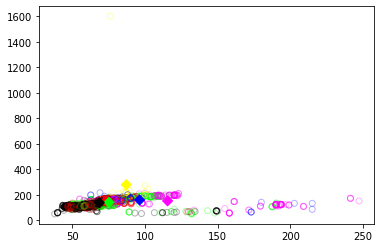

In [14]:
Kmus, X, Rnk,data = runKMeans(6,"encoded_smartphone_data.csv")
plotCurrent(X,Rnk,Kmus)
data